# Case-Study Title: Using Classification algorithms in Financial markets (Stock Market Prediction)
###### Data Analysis methodology: CRISP-DM
###### Dataset: S&P-500 (The Standard and Poor's 500) Index Timeseries daily data from 2019 to 2023
###### Case Goal: Create an automatic financial trading algorithm for S&P-500 index (Algorithmic Trading)

# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import mplfinance as fplt
import yfinance as yf
import ta
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

# Read Data directly from Yahoo Finance API

In [2]:
data = yf.download(['^GSPC'], start = '2019-01-01', end = '2023-12-31')  # data resolution is daily

[*********************100%***********************]  1 of 1 completed


In [3]:
data.shape  # 1109 records, 6 variables

(1110, 6)

# Business Understanding
 * know business process and issues
 * know the context of the problem
 * know the order of numbers in the business

# Data Understanding
## Data Inspection (Data Understanding from Free Perspective)
### Dataset variables definition

In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

* **Index**:        the Timestamp of record (Date)
* **Open**:         the price of asset at market opening (Start of day)
* **High**:         the maximum price of asset in a day
* **Low**:          the minimum price of asset in a day
* **Close**:        the price of asset at market closing (End of day)
* **Adj Close**:
* **Volume**:       the trading volume of asset in a day

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000
2023-05-26,4156.160156,4212.870117,4156.160156,4205.450195,4205.450195,3715460000
2023-05-30,4226.709961,4231.100098,4192.180176,4208.359863,4208.359863,1689494000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1110 entries, 2019-01-02 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1110 non-null   float64
 1   High       1110 non-null   float64
 2   Low        1110 non-null   float64
 3   Close      1110 non-null   float64
 4   Adj Close  1110 non-null   float64
 5   Volume     1110 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.7 KB


In [9]:
# Do we have any NA in our Variables?
data.isna().sum()

# We have no MV problem in this dataset

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Check for abnormality in data
data.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume
count,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1.110000e+03
mean,3663.409009,3686.455585,3638.672677,3664.193171,3664.193171,4.360201e+09
std,617.937756,620.428760,615.112528,617.650708,617.650708,1.088758e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,3050.329956,3081.562561,3024.497498,3051.057556,3051.057556,3.688058e+09
50%,3800.530029,3830.160034,3761.780029,3799.260010,3799.260010,4.119295e+09
75%,4155.890137,4178.657471,4128.237427,4158.637573,4158.637573,4.777915e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


### Data Visualization of Financial Data

In [11]:
data.index  # index of our dataset is Timestamp (Date)

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30'],
              dtype='datetime64[ns]', name='Date', length=1110, freq=None)

In [12]:
data.loc['2019-01-02']  # retrieve data for day '2019-01-02'

Open         2.476960e+03
High         2.519490e+03
Low          2.467470e+03
Close        2.510030e+03
Adj Close    2.510030e+03
Volume       3.733160e+09
Name: 2019-01-02 00:00:00, dtype: float64

<Axes: xlabel='Date'>

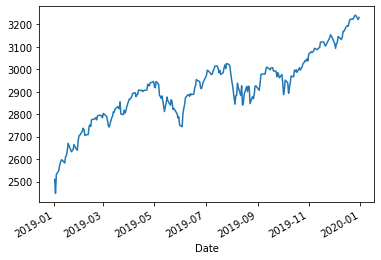

In [13]:
data.loc['2019', 'Close'].plot()  # plot 'Close' data for year '2019'

<Axes: xlabel='Date'>

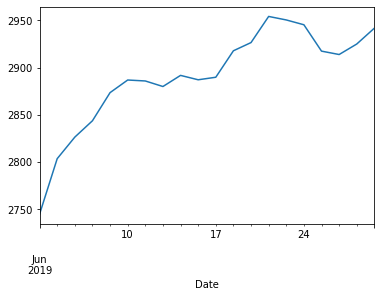

In [14]:
data.loc['2019-06', 'Close'].plot()  # plot 'Close' data for month 'June 2019'

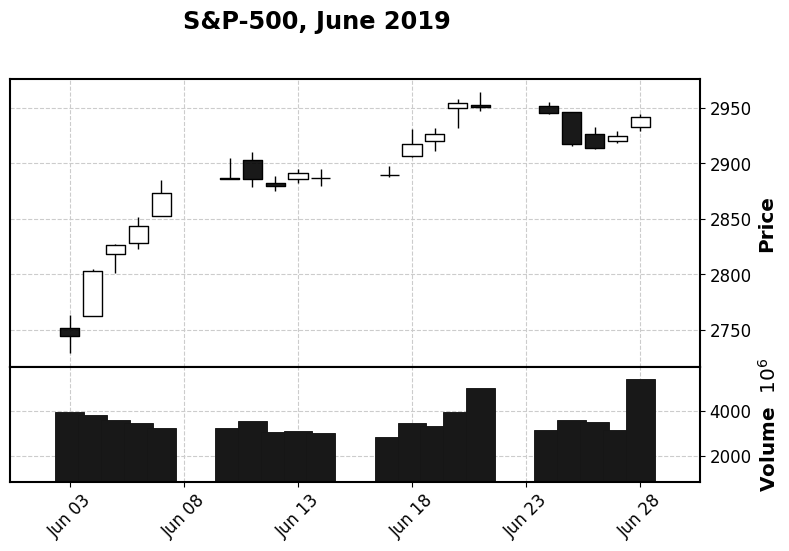

In [15]:
# Candlestick plot
fplt.plot(data.loc['2019-06'],
          type = 'candle',
          style = 'classic',
          volume = True,
          show_nontrading = True,
          figratio = (10, 6),
          title = 'S&P-500, June 2019')

# Data PreProcessing
## Prepare some Technical Analysis Indicators to use as Features in our ML models

Simple Moving Average (SMA)

In [16]:
sma5 = ta.trend.sma_indicator(data['Close'], 5)  # Moving Average 5
sma20 = ta.trend.sma_indicator(data['Close'], 20)  # Moving Average 30

In [17]:
sma20.head(20)  # first 19 data is NaN (Missing Value)

Date
2019-01-02            NaN
2019-01-03            NaN
2019-01-04            NaN
2019-01-07            NaN
2019-01-08            NaN
2019-01-09            NaN
2019-01-10            NaN
2019-01-11            NaN
2019-01-14            NaN
2019-01-15            NaN
2019-01-16            NaN
2019-01-17            NaN
2019-01-18            NaN
2019-01-22            NaN
2019-01-23            NaN
2019-01-24            NaN
2019-01-25            NaN
2019-01-28            NaN
2019-01-29            NaN
2019-01-30    2602.554492
Name: sma_20, dtype: float64

In [18]:
sma20.tail()

Date
2023-05-23    4135.965503
2023-05-24    4138.928015
2023-05-25    4139.724500
2023-05-26    4141.523010
2023-05-30    4143.547498
Name: sma_20, dtype: float64

Exponential Moving Average (EMA)

In [19]:
ema5 = ta.trend.ema_indicator(data['Close'], 5)
ema20 = ta.trend.ema_indicator(data['Close'], 20)

In [20]:
ema20.head(20)

Date
2019-01-02            NaN
2019-01-03            NaN
2019-01-04            NaN
2019-01-07            NaN
2019-01-08            NaN
2019-01-09            NaN
2019-01-10            NaN
2019-01-11            NaN
2019-01-14            NaN
2019-01-15            NaN
2019-01-16            NaN
2019-01-17            NaN
2019-01-18            NaN
2019-01-22            NaN
2019-01-23            NaN
2019-01-24            NaN
2019-01-25            NaN
2019-01-28            NaN
2019-01-29            NaN
2019-01-30    2612.054645
Name: ema_20, dtype: float64

In [21]:
ema20.tail()

Date
2023-05-23    4140.683316
2023-05-24    4138.260166
2023-05-25    4139.500129
2023-05-26    4145.781088
2023-05-30    4151.740971
Name: ema_20, dtype: float64

Relative Strength Index (RSI)

In [22]:
rsi3 = ta.momentum.rsi(data['Open'], 3)

In [23]:
rsi3.head()

Date
2019-01-02          NaN
2019-01-03          NaN
2019-01-04    36.183480
2019-01-07    85.278395
2019-01-08    90.867552
Name: rsi, dtype: float64

In [24]:
rsi3.tail()

Date
2023-05-23    55.750487
2023-05-24    26.306605
2023-05-25    47.776014
2023-05-26    48.223761
2023-05-30    82.829070
Name: rsi, dtype: float64

In [25]:
data['sma5'] = sma5
data['sma20'] = sma20
data['ema5'] = ema5
data['ema20'] = ema20
data['rsi3'] = rsi3

In [26]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,rsi3
Date,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN,NaN,NaN,NaN,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,NaN,NaN,NaN,NaN,NaN
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,NaN,NaN,NaN,NaN,36.183480
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,NaN,NaN,NaN,NaN,85.278395
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,2522.791943,NaN,2537.411919,NaN,90.867552


Calculate Daily Return = (today's Close price - yesterday's Close price) / yesterday's Close price

In [27]:
data['d_return'] = 0

In [28]:
for i in range(1, data.shape[0]):
    data.iloc[i, 11] = data.iloc[i, 3] / data.iloc[i - 1, 3] - 1
    
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,rsi3,d_return
Date,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN,NaN,NaN,NaN,NaN,0.000000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,NaN,NaN,NaN,NaN,NaN,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,NaN,NaN,NaN,NaN,36.183480,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,NaN,NaN,NaN,NaN,85.278395,0.007010
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,2522.791943,NaN,2537.411919,NaN,90.867552,0.009695


Calculate Volume Change

In [29]:
data['volume_change'] = 0

for i in range(1, data.shape[0]):
    if data.iloc[i - 1, 5] != 0:
        data.iloc[i, 12] = data.iloc[i, 5] / data.iloc[i - 1, 5] - 1
    else:
        data.iloc[i, 12] = 1
    
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,rsi3,d_return,volume_change
Date,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,NaN,NaN,NaN,NaN,NaN,-0.024757,0.033663
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,NaN,NaN,NaN,NaN,36.183480,0.034336,0.097260
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,NaN,NaN,NaN,NaN,85.278395,0.007010,-0.023858
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,2522.791943,NaN,2537.411919,NaN,90.867552,0.009695,-0.003160


In [30]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,rsi3,d_return,volume_change
Date,,,,,,,,,,,,,
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000,4177.401953,4135.965503,4166.001377,4140.683316,55.750487,-0.011222,0.114469
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000,4168.695996,4138.928015,4149.080996,4138.260166,26.306605,-0.007319,-0.100151
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000,4159.341992,4139.724500,4149.813926,4139.500129,47.776014,0.008758,0.109276
2023-05-26,4156.160156,4212.870117,4156.160156,4205.450195,4205.450195,3715460000,4162.036035,4141.523010,4168.359349,4145.781088,48.223761,0.013049,-0.104225
2023-05-30,4226.709961,4231.100098,4192.180176,4208.359863,4208.359863,1689494000,4165.182031,4143.547498,4181.692854,4151.740971,82.829070,0.000692,-0.545280


Plot Daily Return

<Axes: xlabel='Date'>

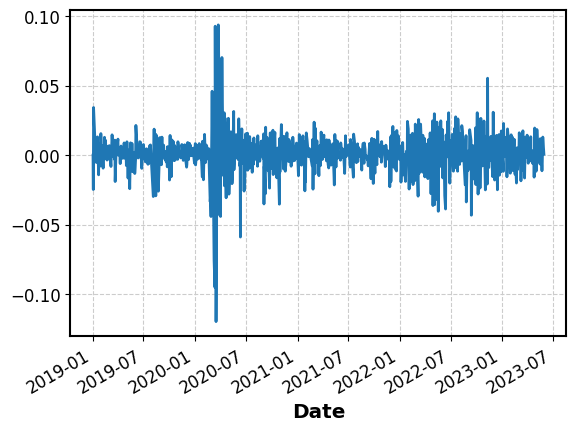

In [31]:
data['d_return'].plot()  # very noisy around 0

# do some Timeseries Analysis here: is this a White Noise? is this a Random Walk model?

<Axes: xlabel='d_return', ylabel='Probability'>

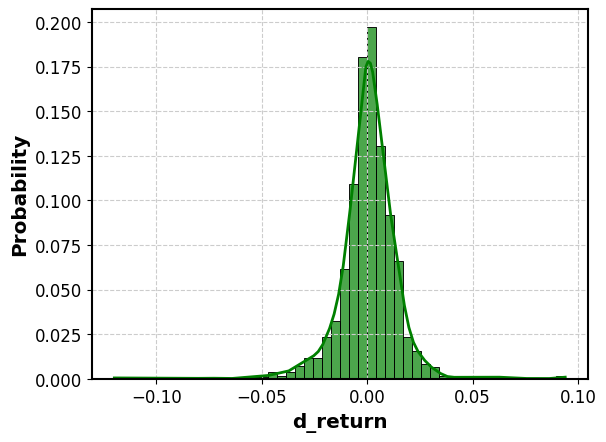

In [32]:
# Plot Histogram of Daily Return
sns.histplot(data['d_return'], 
             stat = 'probability', 
             kde = True, 
             alpha = 0.7, 
             color = 'green',
             bins = 50)

# usually, distribution of 'Return' in Finance Markets is t-student

In [33]:
data['d_return'].describe()

count    1110.000000
mean        0.000565
std         0.014048
min        -0.119841
25%        -0.005349
50%         0.000884
75%         0.007395
max         0.093828
Name: d_return, dtype: float64

In [34]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,rsi3,d_return,volume_change
Date,,,,,,,,,,,,,
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000,4177.401953,4135.965503,4166.001377,4140.683316,55.750487,-0.011222,0.114469
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000,4168.695996,4138.928015,4149.080996,4138.260166,26.306605,-0.007319,-0.100151
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000,4159.341992,4139.724500,4149.813926,4139.500129,47.776014,0.008758,0.109276
2023-05-26,4156.160156,4212.870117,4156.160156,4205.450195,4205.450195,3715460000,4162.036035,4141.523010,4168.359349,4145.781088,48.223761,0.013049,-0.104225
2023-05-30,4226.709961,4231.100098,4192.180176,4208.359863,4208.359863,1689494000,4165.182031,4143.547498,4181.692854,4151.740971,82.829070,0.000692,-0.545280


Add Lags: probably, some few past days can be a good predictor for today!

In [35]:
data['sma5_lag1'] = data['sma5'].shift(1)
data['sma20_lag1'] = data['sma20'].shift(1)
data['ema5_lag1'] = data['ema5'].shift(1)
data['ema20_lag1'] = data['ema20'].shift(1)
data['rsi3_lag1'] = data['rsi3'].shift(1)
data['h_lag1'] = data['High'].shift(1)
data['l_lag1'] = data['Low'].shift(1)

# Daily Return Lag: add lag 1 to 5
data['r_lag1'] = data['d_return'].shift(1)
data['r_lag2'] = data['d_return'].shift(2)
data['r_lag3'] = data['d_return'].shift(3)
data['r_lag4'] = data['d_return'].shift(4)
data['r_lag5'] = data['d_return'].shift(5)

# Volume Change Lag: add lag 1 to 5
data['v_lag1'] = data['volume_change'].shift(1)
data['v_lag2'] = data['volume_change'].shift(2)
data['v_lag3'] = data['volume_change'].shift(3)
data['v_lag4'] = data['volume_change'].shift(4)
data['v_lag5'] = data['volume_change'].shift(5)

data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,NaN,NaN,NaN,NaN,...,-0.024757,0.000000,NaN,NaN,NaN,0.033663,0.000000,NaN,NaN,NaN
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,NaN,NaN,NaN,NaN,...,0.034336,-0.024757,0.000000,NaN,NaN,0.097260,0.033663,0.000000,NaN,NaN
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,2522.791943,NaN,2537.411919,NaN,...,0.007010,0.034336,-0.024757,0.0,NaN,-0.023858,0.097260,0.033663,0.0,NaN


In [36]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000,4177.401953,4135.965503,4166.001377,4140.683316,...,0.000155,-0.001446,0.009445,0.011891,-0.006378,-0.077533,0.015425,-0.014503,0.105325,0.025835
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000,4168.695996,4138.928015,4149.080996,4138.260166,...,-0.011222,0.000155,-0.001446,0.009445,0.011891,0.114469,-0.077533,0.015425,-0.014503,0.105325
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000,4159.341992,4139.724500,4149.813926,4139.500129,...,-0.007319,-0.011222,0.000155,-0.001446,0.009445,-0.100151,0.114469,-0.077533,0.015425,-0.014503
2023-05-26,4156.160156,4212.870117,4156.160156,4205.450195,4205.450195,3715460000,4162.036035,4141.523010,4168.359349,4145.781088,...,0.008758,-0.007319,-0.011222,0.000155,-0.001446,0.109276,-0.100151,0.114469,-0.077533,0.015425
2023-05-30,4226.709961,4231.100098,4192.180176,4208.359863,4208.359863,1689494000,4165.182031,4143.547498,4181.692854,4151.740971,...,0.013049,0.008758,-0.007319,-0.011222,0.000155,-0.104225,0.109276,-0.100151,0.114469,-0.077533


In [37]:
# add market trend (label our data based-on Daily Return)
conditions = [data['d_return'] <= 0, data['d_return'] > 0]
values = [0, 1]  # directions of Market
data['trend'] = np.select(conditions, values)
data.head(20)

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.033663,0.000000,NaN,NaN,NaN,1
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,NaN,NaN,NaN,NaN,...,-0.024757,0.000000,NaN,NaN,0.097260,0.033663,0.000000,NaN,NaN,1
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,2522.791943,NaN,2537.411919,NaN,...,0.034336,-0.024757,0.000000,NaN,-0.023858,0.097260,0.033663,0.000000,NaN,1
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4088740000,2537.777930,NaN,2553.261267,NaN,...,0.007010,0.034336,-0.024757,0.000000,-0.003160,-0.023858,0.097260,0.033663,0.000000,1
2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3721300000,2567.527930,NaN,2567.720809,NaN,...,0.009695,0.007010,0.034336,-0.024757,-0.007602,-0.003160,-0.023858,0.097260,0.033663,1
2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3447460000,2580.391943,NaN,2577.233876,NaN,...,0.004098,0.009695,0.007010,0.034336,-0.089866,-0.007602,-0.003160,-0.023858,0.097260,0
2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3689370000,2586.975977,NaN,2579.025953,NaN,...,0.004518,0.004098,0.009695,0.007010,-0.073587,-0.089866,-0.007602,-0.003160,-0.023858,0


> We want to predict **'trend'** column: Predict Market Direction

In [38]:
# Remove first 20 rows (rows with NaN and 0.0000) from dataset
data.drop(index = data.index[range(20)], inplace = True)
data.head()  # Prepared dataset

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,2685.489990,2708.949951,2678.649902,2704.100098,2704.100098,4953800000,2666.752051,2612.257996,2672.067029,2620.820878,...,-0.001456,-0.007847,0.008489,0.001376,0.103807,-0.031054,-0.049772,0.107783,0.026932,1
2019-02-01,2702.320068,2716.659912,2696.879883,2706.530029,2706.530029,3782490000,2675.106055,2625.190002,2683.554696,2628.983655,...,0.015549,-0.001456,-0.007847,0.008489,0.275677,0.103807,-0.031054,-0.049772,0.107783,1
2019-02-04,2706.489990,2724.989990,2698.750000,2724.870117,2724.870117,3369450000,2691.310059,2634.836511,2697.326503,2638.115699,...,0.008597,0.015549,-0.001456,-0.007847,-0.236447,0.275677,0.103807,-0.031054,-0.049772,1
2019-02-05,2728.340088,2738.979980,2724.030029,2737.699951,2737.699951,3597620000,2710.850049,2644.237012,2710.784319,2647.599913,...,0.000899,0.008597,0.015549,-0.001456,-0.109198,-0.236447,0.275677,0.103807,-0.031054,1
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,2720.962061,2652.097021,2717.726248,2655.600884,...,0.006776,0.000899,0.008597,0.015549,0.067717,-0.109198,-0.236447,0.275677,0.103807,0


In [39]:
data.isna().sum()  # check NA

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
sma5             0
sma20            0
ema5             0
ema20            0
rsi3             0
d_return         0
volume_change    0
sma5_lag1        0
sma20_lag1       0
ema5_lag1        0
ema20_lag1       0
rsi3_lag1        0
h_lag1           0
l_lag1           0
r_lag1           0
r_lag2           0
r_lag3           0
r_lag4           0
r_lag5           0
v_lag1           0
v_lag2           0
v_lag3           0
v_lag4           0
v_lag5           0
trend            0
dtype: int64

## Correlation Analysis

In [40]:
# correlation table between 'd_return' and continuous variables
corr_table = round(data[['d_return',
                         'sma5_lag1',
                         'sma20_lag1',
                         'ema5_lag1',
                         'ema20_lag1',
                         'rsi3_lag1',
                         'h_lag1',
                         'l_lag1',
                         'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                         'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5'
                        ]].corr(method = 'pearson'), 2)
corr_table

,d_return,sma5_lag1,sma20_lag1,ema5_lag1,ema20_lag1,rsi3_lag1,h_lag1,l_lag1,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
d_return,1.00,-0.05,-0.05,-0.05,-0.05,-0.03,-0.05,-0.05,-0.20,0.13,-0.03,-0.07,0.08,-0.00,0.04,-0.05,0.01,-0.02
sma5_lag1,-0.05,1.00,0.99,1.00,0.99,-0.07,1.00,1.00,-0.04,-0.03,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,-0.01
sma20_lag1,-0.05,0.99,1.00,0.99,1.00,-0.14,0.99,0.98,-0.05,-0.05,-0.04,-0.04,-0.04,-0.00,-0.00,-0.00,-0.00,-0.00
ema5_lag1,-0.05,1.00,0.99,1.00,0.99,-0.07,1.00,1.00,-0.03,-0.02,-0.01,-0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.01
ema20_lag1,-0.05,0.99,1.00,0.99,1.00,-0.13,0.99,0.99,-0.04,-0.04,-0.03,-0.03,-0.03,-0.00,-0.00,-0.00,-0.00,-0.01
rsi3_lag1,-0.03,-0.07,-0.14,-0.07,-0.13,1.00,-0.03,-0.01,0.13,0.49,0.35,0.26,0.15,0.03,-0.10,-0.07,-0.01,-0.02
h_lag1,-0.05,1.00,0.99,1.00,0.99,-0.03,1.00,1.00,-0.01,0.01,0.01,0.01,0.00,-0.00,-0.01,-0.01,-0.01,-0.01
l_lag1,-0.05,1.00,0.98,1.00,0.99,-0.01,1.00,1.00,-0.00,0.01,0.02,0.02,0.01,-0.01,-0.01,-0.01,-0.01,-0.01
r_lag1,-0.20,-0.04,-0.05,-0.03,-0.04,0.13,-0.01,-0.00,1.00,-0.20,0.13,-0.03,-0.07,-0.12,-0.00,0.04,-0.04,0.01
r_lag2,0.13,-0.03,-0.05,-0.02,-0.04,0.49,0.01,0.01,-0.20,1.00,-0.20,0.13,-0.03,0.01,-0.12,-0.00,0.04,-0.05


> **'r_lag1'** and **'r_lag2'** have good correlation

<Axes: >

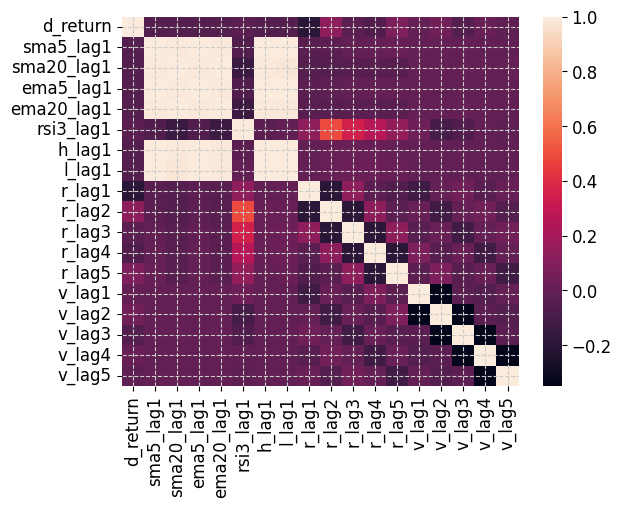

In [41]:
sns.heatmap(corr_table, annot = False)

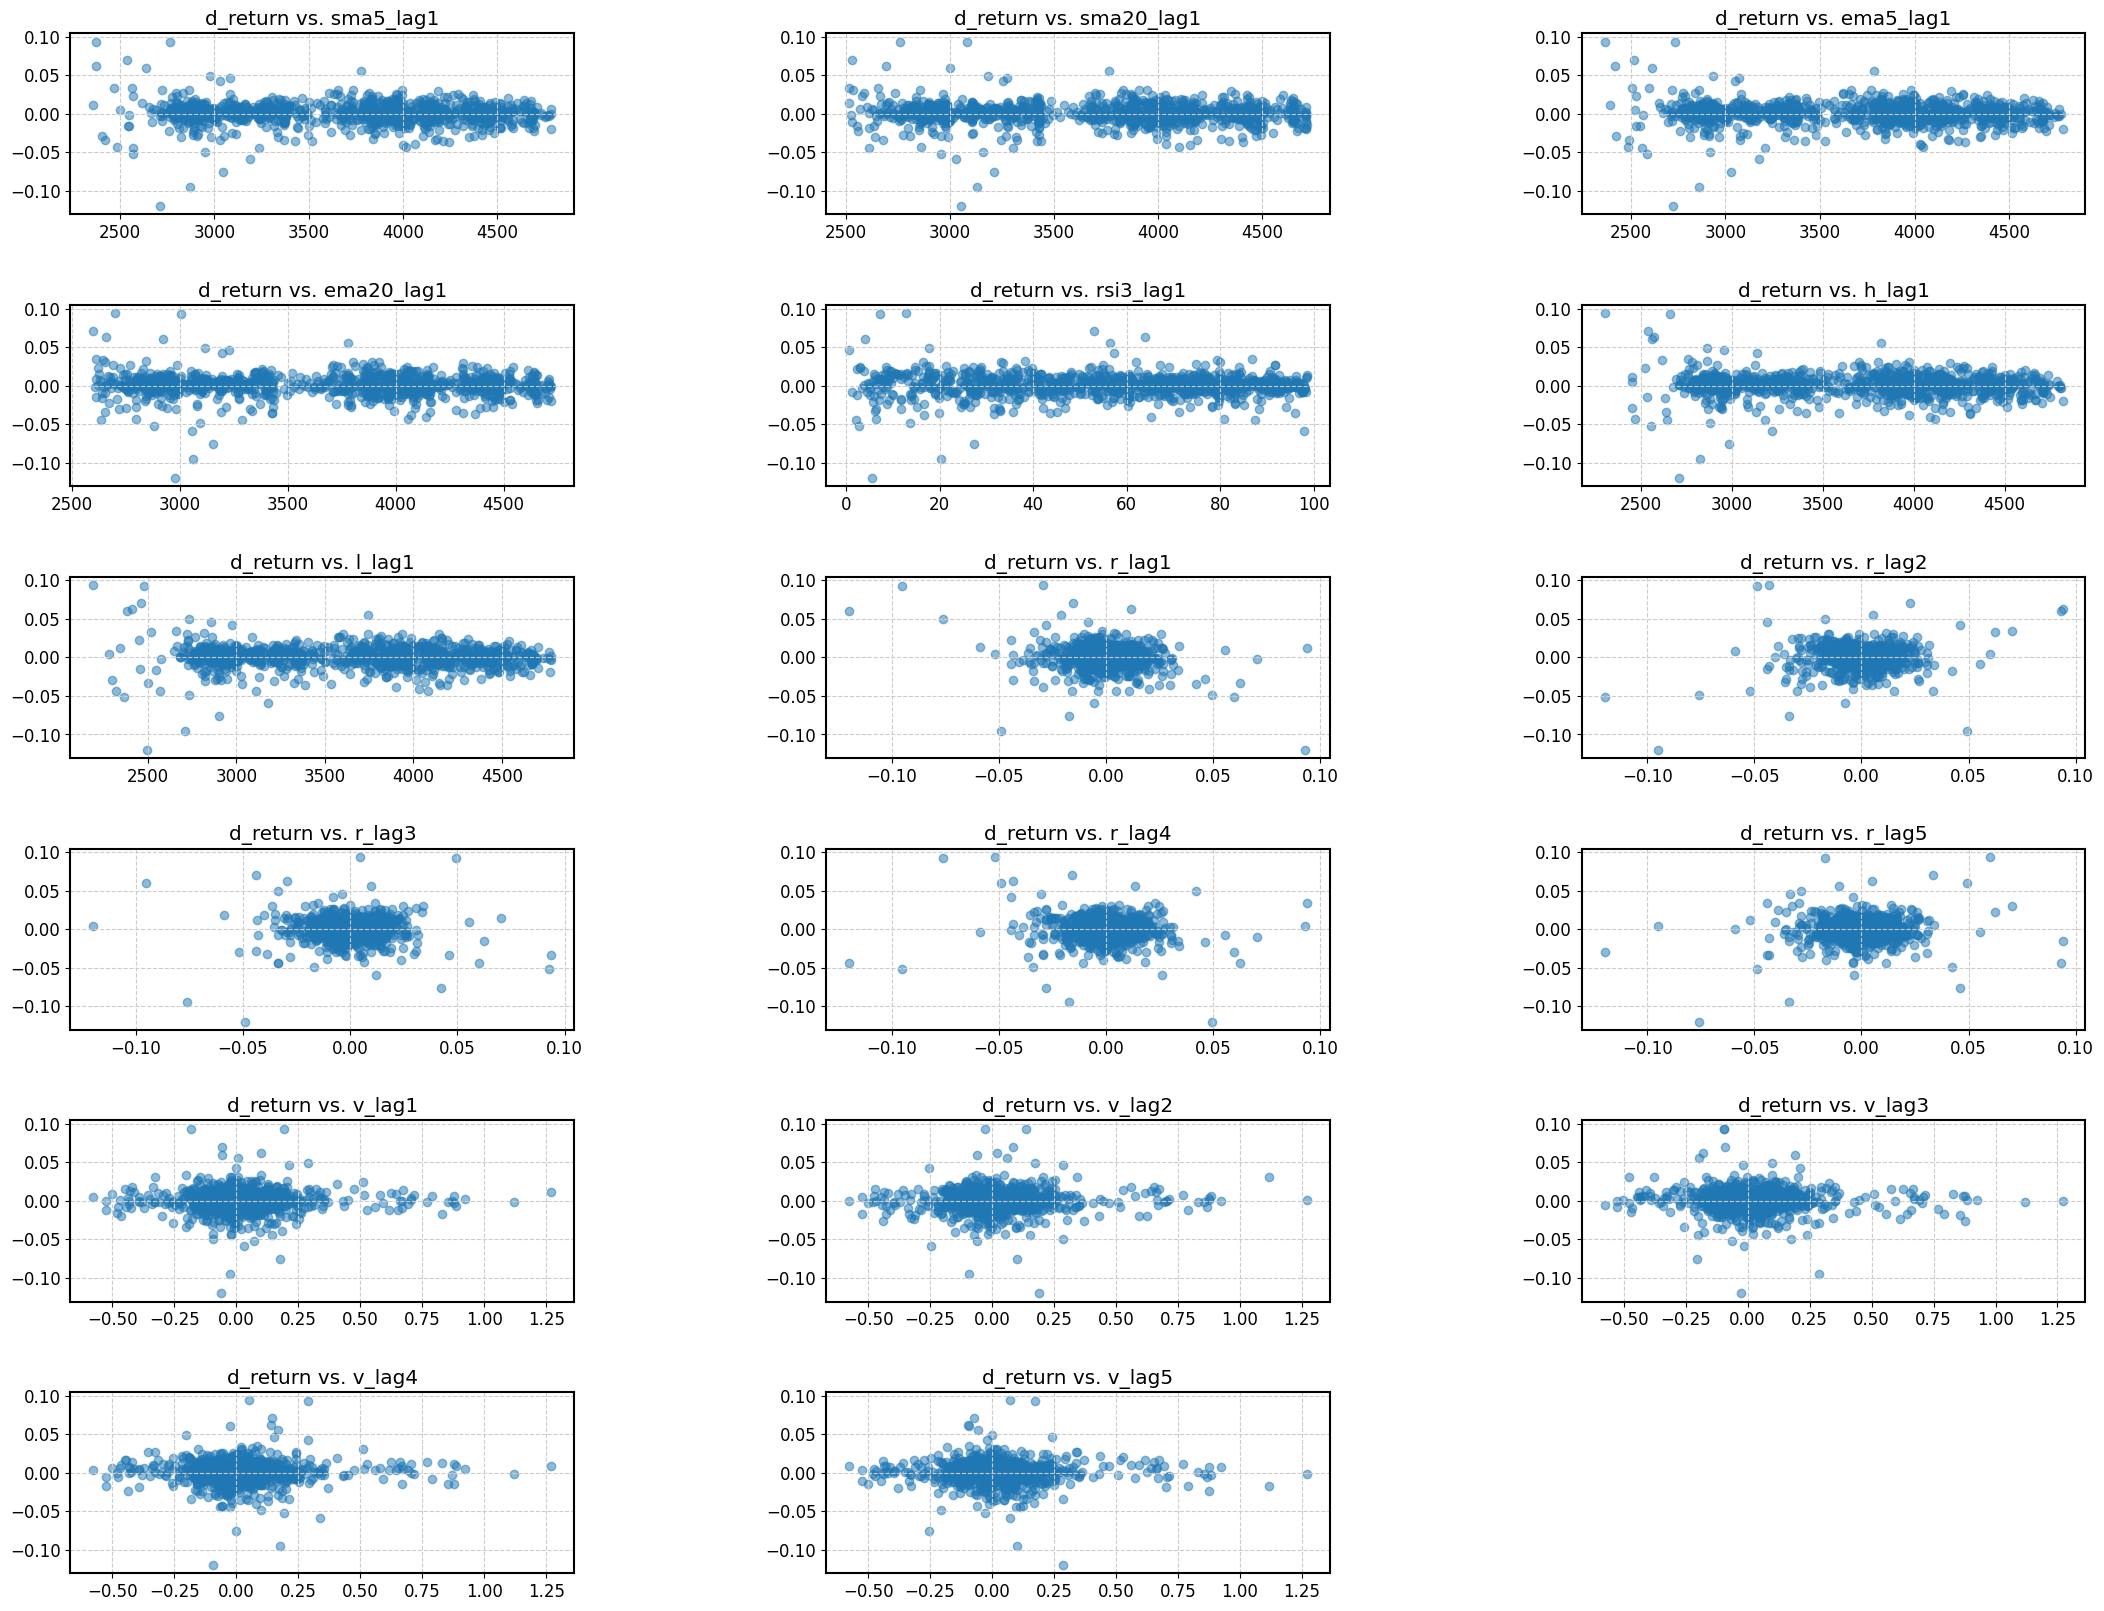

In [42]:
# Scatter Plot (between 'd_return' and other continuous variables 2 by 2)
var_ind = list(range(13,30))
plot = plt.figure(figsize = (26, 20))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(6, 3, i)
    a.scatter(x = data.iloc[:, var_ind[i - 1]],
              y = data.iloc[:, 11],
              alpha = 0.5)
    a.title.set_text('d_return vs. ' + data.columns[var_ind[i - 1]])

## Divide Dataset into Train and Test and Real

In [43]:
train = data.loc['2019':'2020']
train

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,2685.489990,2708.949951,2678.649902,2704.100098,2704.100098,4953800000,2666.752051,2612.257996,2672.067029,2620.820878,...,-0.001456,-0.007847,0.008489,0.001376,0.103807,-0.031054,-0.049772,0.107783,0.026932,1
2019-02-01,2702.320068,2716.659912,2696.879883,2706.530029,2706.530029,3782490000,2675.106055,2625.190002,2683.554696,2628.983655,...,0.015549,-0.001456,-0.007847,0.008489,0.275677,0.103807,-0.031054,-0.049772,0.107783,1
2019-02-04,2706.489990,2724.989990,2698.750000,2724.870117,2724.870117,3369450000,2691.310059,2634.836511,2697.326503,2638.115699,...,0.008597,0.015549,-0.001456,-0.007847,-0.236447,0.275677,0.103807,-0.031054,-0.049772,1
2019-02-05,2728.340088,2738.979980,2724.030029,2737.699951,2737.699951,3597620000,2710.850049,2644.237012,2710.784319,2647.599913,...,0.000899,0.008597,0.015549,-0.001456,-0.109198,-0.236447,0.275677,0.103807,-0.031054,1
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3486590000,2720.962061,2652.097021,2717.726248,2655.600884,...,0.006776,0.000899,0.008597,0.015549,0.067717,-0.109198,-0.236447,0.275677,0.103807,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000,3696.931982,3680.314502,3696.539747,3668.413461,...,-0.002073,-0.003906,-0.003511,0.005758,-0.067636,-0.146416,-0.330913,0.692683,0.030924,1
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000,3702.122021,3685.165002,3709.479867,3674.789332,...,0.000746,-0.002073,-0.003906,-0.003511,-0.501535,-0.067636,-0.146416,-0.330913,0.692683,1
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000,3708.546045,3690.435510,3715.333258,3679.765589,...,0.003537,0.000746,-0.002073,-0.003906,0.876790,-0.501535,-0.067636,-0.146416,-0.330913,0


In [44]:
test = data.loc['2021']
test

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000,3730.232031,3699.964514,3721.966509,3692.404947,...,0.001342,-0.002227,0.008723,0.003537,0.007668,-0.070268,-0.040213,0.876790,-0.501535,0
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000,3728.532031,3701.351514,3723.597709,3695.686391,...,0.006439,0.001342,-0.002227,0.008723,0.577520,0.007668,-0.070268,-0.040213,0.876790,1
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000,3732.752002,3704.160510,3731.778437,3700.681963,...,-0.014755,0.006439,0.001342,-0.002227,-0.084542,0.577520,0.007668,-0.070268,-0.040213,1
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000,3747.102002,3709.237512,3755.782304,3710.501779,...,0.007083,-0.014755,0.006439,0.001342,0.320863,-0.084542,0.577520,0.007668,-0.070268,1
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000,3760.823975,3716.830505,3778.748180,3721.375889,...,0.005710,0.007083,-0.014755,0.006439,-0.159125,0.320863,-0.084542,0.577520,0.007668,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2770290000,4686.158008,4647.147534,4716.082919,4666.756632,...,0.010180,0.017778,-0.011388,-0.010288,-0.122475,-0.184858,-0.121507,-0.419601,0.653813,1
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2707920000,4729.824023,4653.701538,4739.505312,4678.146485,...,0.006224,0.010180,0.017778,-0.011388,-0.049004,-0.122475,-0.184858,-0.121507,-0.419601,0
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2963310000,4758.590039,4665.004541,4757.356894,4689.090635,...,0.013839,0.006224,0.010180,0.017778,-0.022514,-0.049004,-0.122475,-0.184858,-0.121507,1


In [45]:
real = data.loc['2022':'2023']
real

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,4784.176074,4700.649536,4775.551728,4712.956858,...,-0.002990,0.001402,-0.001010,0.013839,-0.143084,0.054547,0.094312,-0.022514,-0.049004,1
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,4785.614062,4710.743042,4781.547832,4720.631447,...,-0.002626,-0.002990,0.001402,-0.001010,0.430649,-0.143084,0.054547,0.094312,-0.022514,0
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,4767.118066,4711.434546,4754.558580,4718.721793,...,0.006374,-0.002626,-0.002990,0.001402,0.222434,0.430649,-0.143084,0.054547,0.094312,0
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,4750.582031,4711.176538,4735.055655,4716.562556,...,-0.000630,0.006374,-0.002626,-0.002990,0.043729,0.222434,0.430649,-0.143084,0.054547,0
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,4732.751953,4711.655518,4715.713699,4712.797530,...,-0.019393,-0.000630,0.006374,-0.002626,-0.121253,0.043729,0.222434,0.430649,-0.143084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000,4177.401953,4135.965503,4166.001377,4140.683316,...,-0.001446,0.009445,0.011891,-0.006378,-0.077533,0.015425,-0.014503,0.105325,0.025835,0
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000,4168.695996,4138.928015,4149.080996,4138.260166,...,0.000155,-0.001446,0.009445,0.011891,0.114469,-0.077533,0.015425,-0.014503,0.105325,0
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000,4159.341992,4139.724500,4149.813926,4139.500129,...,-0.011222,0.000155,-0.001446,0.009445,-0.100151,0.114469,-0.077533,0.015425,-0.014503,1


# Modeling
## Model 1: Logistic Regression

In [46]:
# Define the features set X (features-matrix)
X_train = train[['sma5_lag1',
                 'sma20_lag1',
                 'ema5_lag1',
                 'ema20_lag1',
                 'rsi3_lag1',
                 'h_lag1',
                 'l_lag1',
                 'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                 'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5'
                        ]]
X_train = sm.add_constant(X_train)  # adding a constant column (a column of 1)

# Define response variable (response-matrix)
y_train = train['trend']

In [47]:
X_train.head()

,const,sma5_lag1,sma20_lag1,ema5_lag1,ema20_lag1,rsi3_lag1,h_lag1,l_lag1,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,
2019-01-31,1.0,2654.398047,2602.554492,2656.050494,2612.054645,67.814972,2690.439941,2648.340088,0.015549,-0.001456,-0.007847,0.008489,0.001376,0.103807,-0.031054,-0.049772,0.107783,0.026932
2019-02-01,1.0,2666.752051,2612.257996,2672.067029,2620.820878,88.320770,2708.949951,2678.649902,0.008597,0.015549,-0.001456,-0.007847,0.008489,0.275677,0.103807,-0.031054,-0.049772,0.107783
2019-02-04,1.0,2675.106055,2625.190002,2683.554696,2628.983655,92.238086,2716.659912,2696.879883,0.000899,0.008597,0.015549,-0.001456,-0.007847,-0.236447,0.275677,0.103807,-0.031054,-0.049772
2019-02-05,1.0,2691.310059,2634.836511,2697.326503,2638.115699,93.098401,2724.989990,2698.750000,0.006776,0.000899,0.008597,0.015549,-0.001456,-0.109198,-0.236447,0.275677,0.103807,-0.031054
2019-02-06,1.0,2710.850049,2644.237012,2710.784319,2647.599913,96.311622,2738.979980,2724.030029,0.004708,0.006776,0.000899,0.008597,0.015549,0.067717,-0.109198,-0.236447,0.275677,0.103807


In [48]:
y_train.head()

Date
2019-01-31    1
2019-02-01    1
2019-02-04    1
2019-02-05    1
2019-02-06    0
Name: trend, dtype: int32

In [49]:
model_lr = sm.Logit(y_train, X_train).fit()
print(model_lr.summary())

Optimization terminated successfully.
         Current function value: 0.657736
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  485
Model:                          Logit   Df Residuals:                      467
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 May 2023   Pseudo R-squ.:                 0.03344
Time:                        22:22:31   Log-Likelihood:                -319.00
converged:                       True   LL-Null:                       -330.04
Covariance Type:            nonrobust   LLR p-value:                    0.1820
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8719      1.264      1.481      0.139      -0.606       4.350
sma5_lag1     -0.0095      0.

Prediction on train

In [50]:
y_prob_train = model_lr.predict(X_train)
y_prob_train  # probabilities

Date
2019-01-31    0.524390
2019-02-01    0.597847
2019-02-04    0.628831
2019-02-05    0.494246
2019-02-06    0.552655
                ...   
2020-12-24    0.557618
2020-12-28    0.531569
2020-12-29    0.518539
2020-12-30    0.666149
2020-12-31    0.504006
Length: 485, dtype: float64

In [51]:
y_pred_train = [1 if _ > 0.48 else 0 for _ in y_prob_train]  # compare the probabilities with Threshold 48%
y_pred_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [52]:
# Accuracy (how percent True prediction?)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train) * 100

61.649484536082475

In [53]:
# Confusion Matrix for train dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_lr)

#                prediction_0  prediction_1
# observation_0      35            169
# observation_1      17            264

[[ 35 169]
 [ 17 264]]


Prediction on test

In [54]:
# Define the features set X (features-matrix)
X_test = test[['sma5_lag1',
                 'sma20_lag1',
                 'ema5_lag1',
                 'ema20_lag1',
                 'rsi3_lag1',
                 'h_lag1',
                 'l_lag1',
                 'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                 'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5'
                        ]]
X_test = sm.add_constant(X_test)  # adding a constant column (a column of 1)
X_test.head()

,const,sma5_lag1,sma20_lag1,ema5_lag1,ema20_lag1,rsi3_lag1,h_lag1,l_lag1,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,
2021-01-04,1.0,3730.714063,3698.268018,3732.624813,3691.537057,60.573675,3760.199951,3726.879883,0.006439,0.001342,-0.002227,0.008723,0.003537,0.007668,-0.070268,-0.040213,0.876790,-0.501535
2021-01-05,1.0,3730.232031,3699.964514,3721.966509,3692.404947,82.187001,3769.989990,3662.709961,-0.014755,0.006439,0.001342,-0.002227,0.008723,0.577520,0.007668,-0.070268,-0.040213,0.876790
2021-01-06,1.0,3728.532031,3701.351514,3723.597709,3695.686391,29.916935,3737.830078,3695.070068,0.007083,-0.014755,0.006439,0.001342,-0.002227,-0.084542,0.577520,0.007668,-0.070268,-0.040213
2021-01-07,1.0,3732.752002,3704.160510,3731.778437,3700.681963,41.750100,3783.040039,3705.340088,0.005710,0.007083,-0.014755,0.006439,0.001342,0.320863,-0.084542,0.577520,0.007668,-0.070268
2021-01-08,1.0,3747.102002,3709.237512,3755.782304,3710.501779,69.941423,3811.550049,3764.709961,0.014847,0.005710,0.007083,-0.014755,0.006439,-0.159125,0.320863,-0.084542,0.577520,0.007668


In [55]:
# Define response variable (response-matrix)
y_test = test['trend']
y_test.head()

Date
2021-01-04    0
2021-01-05    1
2021-01-06    1
2021-01-07    1
2021-01-08    1
Name: trend, dtype: int32

In [56]:
y_prob_test = model_lr.predict(X_test)
y_prob_test

Date
2021-01-04    0.563146
2021-01-05    0.332060
2021-01-06    0.578458
2021-01-07    0.470836
2021-01-08    0.488301
                ...   
2021-12-27    0.399011
2021-12-28    0.465411
2021-12-29    0.508314
2021-12-30    0.457480
2021-12-31    0.454195
Length: 252, dtype: float64

In [57]:
y_pred_test = pd.Series([1 if _ > 0.48 else 0 for _ in y_prob_test], index = y_prob_test.index)
y_pred_test

Date
2021-01-04    1
2021-01-05    0
2021-01-06    1
2021-01-07    0
2021-01-08    1
             ..
2021-12-27    0
2021-12-28    0
2021-12-29    1
2021-12-30    0
2021-12-31    0
Length: 252, dtype: int64

In [58]:
# Accuracy (how percent True prediction?)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test) * 100

52.77777777777778

In [59]:
# Confusion Matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_lr)

#                prediction_0  prediction_1
# observation_0      42            67
# observation_1      52            91

[[42 67]
 [52 91]]


Model Evaluation (based-on Confusion Matrix)

In [60]:
# Positive Predictive Value: if model says the market is Bullish, how percent really will be Bullish?
lr_ppv = 91 / (91 + 67)

lr_ppv * 100

57.59493670886076

In [61]:
# Negative Predictive Value: if model says the market is Bearish, how percent really will be Bearish?
lr_npv = 42 / (42 + 52)

lr_npv * 100

44.680851063829785

## Model 2: Random Forest

In [62]:
# Define the features set X (features-matrix)
X_train = train[['sma5_lag1',
                 'sma20_lag1',
                 'ema5_lag1',
                 'ema20_lag1',
                 'rsi3_lag1',
                 'h_lag1',
                 'l_lag1',
                 'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                 'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5'
                        ]]
X_train.head()  # we have not a constant column

,sma5_lag1,sma20_lag1,ema5_lag1,ema20_lag1,rsi3_lag1,h_lag1,l_lag1,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,
2019-01-31,2654.398047,2602.554492,2656.050494,2612.054645,67.814972,2690.439941,2648.340088,0.015549,-0.001456,-0.007847,0.008489,0.001376,0.103807,-0.031054,-0.049772,0.107783,0.026932
2019-02-01,2666.752051,2612.257996,2672.067029,2620.820878,88.320770,2708.949951,2678.649902,0.008597,0.015549,-0.001456,-0.007847,0.008489,0.275677,0.103807,-0.031054,-0.049772,0.107783
2019-02-04,2675.106055,2625.190002,2683.554696,2628.983655,92.238086,2716.659912,2696.879883,0.000899,0.008597,0.015549,-0.001456,-0.007847,-0.236447,0.275677,0.103807,-0.031054,-0.049772
2019-02-05,2691.310059,2634.836511,2697.326503,2638.115699,93.098401,2724.989990,2698.750000,0.006776,0.000899,0.008597,0.015549,-0.001456,-0.109198,-0.236447,0.275677,0.103807,-0.031054
2019-02-06,2710.850049,2644.237012,2710.784319,2647.599913,96.311622,2738.979980,2724.030029,0.004708,0.006776,0.000899,0.008597,0.015549,0.067717,-0.109198,-0.236447,0.275677,0.103807


In [63]:
y_train.head()

Date
2019-01-31    1
2019-02-01    1
2019-02-04    1
2019-02-05    1
2019-02-06    0
Name: trend, dtype: int32

use k-fold Cross-Validation for tunning model's hyper-parameters

In [64]:
# create hyper-parameters grid
import itertools
max_features = [2, 4, 8, 16]
max_depth = [1, 3, 5]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.001, 0.01, 0.1]
grid = list(itertools.product(max_features, max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, index = range(1, 109), columns = ['max_features', 'max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid

,max_features,max_depth,min_samples_leaf,ccp_alpha
1,2,1,5,0.001
2,2,1,5,0.010
3,2,1,5,0.100
4,2,1,10,0.001
5,2,1,10,0.010
...,...,...,...,...
104,16,5,10,0.010
105,16,5,10,0.100
106,16,5,15,0.001
107,16,5,15,0.010


In [65]:
# 10-fold Cross-Validation approach

k = 10  # create 10 folds
np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])
folds

array([ 3,  3,  7,  2,  4, 10,  7,  2,  1,  2, 10,  1,  1, 10,  4,  5,  1,
        1,  5,  2,  8,  4,  3,  5,  8,  3,  5,  9,  1,  8, 10,  4,  5,  7,
        2,  6,  7,  3,  2,  9,  4,  6,  1,  3,  7,  3,  5,  5,  7,  4,  1,
        7,  5,  8,  7,  8,  2,  6,  8, 10,  3,  5,  9,  2,  3,  2,  2,  4,
        6, 10,  1,  9,  2,  7,  4,  4,  6, 10,  8, 10,  3,  4,  4,  4,  9,
        7, 10,  8,  7,  4, 10,  7,  7,  7,  2,  4,  5,  4,  2,  1,  6,  9,
        7,  9, 10,  2,  1,  4,  2,  4,  5,  8,  7,  2,  5,  4,  4,  8,  7,
        9,  7,  5,  5,  8,  1,  1, 10,  9,  9,  5,  9,  7,  2,  7,  9,  8,
       10,  2,  8,  2,  8, 10,  9,  8,  2,  4,  2,  9,  8,  6,  2,  3,  6,
        3,  3, 10,  4,  3,  7,  8, 10,  2,  4,  9,  4,  8, 10, 10,  4,  4,
        6,  7,  1,  9,  8,  8,  5,  5,  6,  1,  9, 10,  3,  6,  2,  6, 10,
        3,  5,  4,  1,  4,  8,  8,  3,  6,  2,  8,  6, 10,  2,  3,  9,  6,
        1, 10,  4,  4,  4,  2,  8,  7,  4,  2,  8,  3,  7,  6, 10,  9, 10,
        5,  8,  9,  6, 10

In [66]:
cv_accr = pd.DataFrame(index = range(1, k + 1), columns = range(1, 109))
cv_accr

,1,2,3,4,5,6,7,8,9,10,...,99,100,101,102,103,104,105,106,107,108
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        cls_rf = RandomForestClassifier(max_features = grid.loc[i, 'max_features'],
                                        max_depth = grid.loc[i, 'max_depth'],
                                        min_samples_leaf = grid.loc[i, 'min_samples_leaf'],
                                        ccp_alpha = grid.loc[i, 'ccp_alpha'],
                                        n_estimators = 500)
        rf_res = cls_rf.fit(X_train.iloc[folds != j, :], y_train[folds != j])
        pred = pd.Series(rf_res.predict(X_train.iloc[folds == j, :]), index = y_train.index[folds == j])
        cv_accr.iloc[j - 1, i - 1] = accuracy_score(y_train[folds == j], pred) * 100
        
cv_accr  # Cross-Validation Accuracy for 108 different RandomForest models

,1,2,3,4,5,6,7,8,9,10,...,99,100,101,102,103,104,105,106,107,108
1,53.191489,53.191489,53.191489,53.191489,53.191489,53.191489,53.191489,53.191489,53.191489,57.446809,...,53.191489,65.957447,61.702128,53.191489,65.957447,63.829787,53.191489,63.829787,61.702128,53.191489
2,66.071429,66.071429,66.071429,66.071429,66.071429,66.071429,66.071429,66.071429,66.071429,64.285714,...,66.071429,66.071429,67.857143,66.071429,69.642857,66.071429,66.071429,62.5,62.5,66.071429
3,74.358974,74.358974,74.358974,74.358974,74.358974,74.358974,74.358974,74.358974,74.358974,64.102564,...,74.358974,61.538462,56.410256,74.358974,58.974359,61.538462,74.358974,61.538462,58.974359,74.358974
4,57.377049,57.377049,57.377049,57.377049,57.377049,57.377049,57.377049,57.377049,57.377049,55.737705,...,57.377049,60.655738,59.016393,57.377049,57.377049,59.016393,57.377049,59.016393,59.016393,57.377049
5,56.521739,56.521739,56.521739,56.521739,56.521739,56.521739,56.521739,56.521739,56.521739,54.347826,...,56.521739,56.521739,60.869565,56.521739,56.521739,56.521739,56.521739,56.521739,60.869565,56.521739
6,46.511628,46.511628,46.511628,46.511628,46.511628,46.511628,46.511628,46.511628,46.511628,51.162791,...,46.511628,48.837209,48.837209,46.511628,48.837209,48.837209,46.511628,48.837209,48.837209,46.511628
7,68.292683,68.292683,68.292683,68.292683,68.292683,68.292683,68.292683,68.292683,68.292683,68.292683,...,68.292683,73.170732,75.609756,68.292683,63.414634,70.731707,68.292683,73.170732,73.170732,68.292683
8,49.230769,49.230769,49.230769,49.230769,49.230769,49.230769,49.230769,49.230769,49.230769,50.769231,...,49.230769,49.230769,49.230769,49.230769,49.230769,49.230769,49.230769,46.153846,49.230769,49.230769
9,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,52.5,52.5,50.0,52.5,55.0,50.0,50.0,50.0,50.0
10,61.702128,61.702128,61.702128,61.702128,61.702128,61.702128,61.702128,61.702128,61.702128,63.829787,...,61.702128,57.446809,57.446809,61.702128,55.319149,59.574468,61.702128,55.319149,57.446809,61.702128


In [68]:
cv_accr.mean(axis = 0)

1      58.325789
2      58.325789
3      58.325789
4      58.325789
5      58.325789
         ...    
104    59.035196
105    58.325789
106    57.688732
107    58.174796
108    58.325789
Length: 108, dtype: float64

In [69]:
cv_accr.mean(axis = 0).max()

60.72985317770936

In [70]:
cv_accr.mean(axis = 0).argmax() + 1

91

In [71]:
# the Best model's hyper-parameters
grid.iloc[cv_accr.mean(axis = 0).argmax()]

max_features        16.000
max_depth            3.000
min_samples_leaf     5.000
ccp_alpha            0.001
Name: 91, dtype: float64

In [72]:
model_rf = RandomForestClassifier(max_features = 16,
                                  max_depth = 3,
                                  min_samples_leaf = 10,
                                  ccp_alpha = 0.01,
                                  random_state = 123,
                                  n_estimators = 1000
                                 ).fit(X_train, y_train)

Importance of Variables: the percentage of increasing MSE if we remove the variable from the Tree

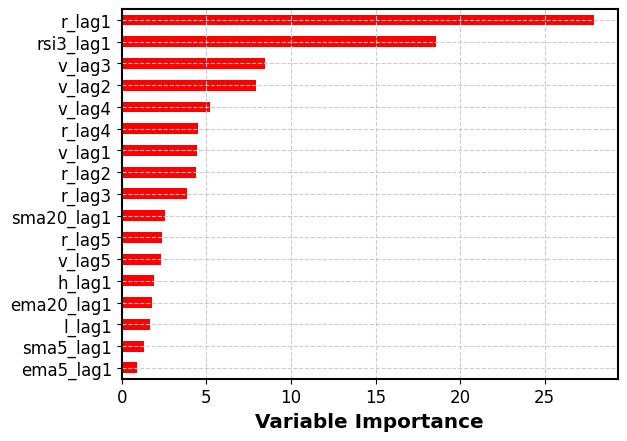

In [73]:
importance = pd.DataFrame({'Importance': model_rf.feature_importances_ * 100}, index = X_train.columns)
importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Prediction on test

In [74]:
X_test = test[['sma5_lag1',
                 'sma20_lag1',
                 'ema5_lag1',
                 'ema20_lag1',
                 'rsi3_lag1',
                 'h_lag1',
                 'l_lag1',
                 'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                 'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5'
                        ]]
X_test.head()

,sma5_lag1,sma20_lag1,ema5_lag1,ema20_lag1,rsi3_lag1,h_lag1,l_lag1,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,
2021-01-04,3730.714063,3698.268018,3732.624813,3691.537057,60.573675,3760.199951,3726.879883,0.006439,0.001342,-0.002227,0.008723,0.003537,0.007668,-0.070268,-0.040213,0.876790,-0.501535
2021-01-05,3730.232031,3699.964514,3721.966509,3692.404947,82.187001,3769.989990,3662.709961,-0.014755,0.006439,0.001342,-0.002227,0.008723,0.577520,0.007668,-0.070268,-0.040213,0.876790
2021-01-06,3728.532031,3701.351514,3723.597709,3695.686391,29.916935,3737.830078,3695.070068,0.007083,-0.014755,0.006439,0.001342,-0.002227,-0.084542,0.577520,0.007668,-0.070268,-0.040213
2021-01-07,3732.752002,3704.160510,3731.778437,3700.681963,41.750100,3783.040039,3705.340088,0.005710,0.007083,-0.014755,0.006439,0.001342,0.320863,-0.084542,0.577520,0.007668,-0.070268
2021-01-08,3747.102002,3709.237512,3755.782304,3710.501779,69.941423,3811.550049,3764.709961,0.014847,0.005710,0.007083,-0.014755,0.006439,-0.159125,0.320863,-0.084542,0.577520,0.007668


In [75]:
y_pred_rf = pd.Series(model_rf.predict(X_test), index = y_test.index)
y_pred_rf

Date
2021-01-04    1
2021-01-05    1
2021-01-06    1
2021-01-07    1
2021-01-08    0
             ..
2021-12-27    1
2021-12-28    1
2021-12-29    1
2021-12-30    1
2021-12-31    1
Length: 252, dtype: int32

In [76]:
# Accuracy (how percent True prediction?)
accuracy_score(y_test, y_pred_rf) * 100

55.952380952380956

In [77]:
# Confusion Matrix for test dataset
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

#                prediction_0  prediction_1
# observation_0      18            91
# observation_1      20            123

[[ 18  91]
 [ 20 123]]


Model Evaluation (based-on Confusion Matrix)

In [78]:
# Positive Predictive Value: if model says the market is Bullish, how percent really will be Bullish?
rf_ppv = 123 / (123 + 91)

rf_ppv * 100

57.476635514018696

In [79]:
# Negative Predictive Value: if model says the market is Bearish, how percent really will be Bearish?
rf_npv = 18 / (18 + 20)

rf_npv * 100

47.368421052631575

## Model 3: Naive Bayes Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(X_train, y_train)

Prediction on test

In [81]:
y_pred_nb = pd.Series(model_nb.predict(X_test), index = y_test.index)
y_pred_nb

Date
2021-01-04    1
2021-01-05    0
2021-01-06    0
2021-01-07    0
2021-01-08    1
             ..
2021-12-27    0
2021-12-28    0
2021-12-29    0
2021-12-30    0
2021-12-31    0
Length: 252, dtype: int32

In [82]:
# Accuracy (how percent True prediction?)
accuracy_score(y_test, y_pred_nb) * 100

44.44444444444444

In [83]:
# Confusion Matrix for test dataset
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_nb)

#                prediction_0  prediction_1
# observation_0      108            1
# observation_1      139            4

[[108   1]
 [139   4]]


Model Evaluation (based-on Confusion Matrix)

In [84]:
# Positive Predictive Value: if model says the market is Bullish, how percent really will be Bullish?
nb_ppv = 4 / (4 + 1)

nb_ppv * 100

80.0

In [85]:
# Negative Predictive Value: if model says the market is Bearish, how percent really will be Bearish?
nb_npv = 108 / (108 + 139)

nb_npv * 100

43.7246963562753

## Model 4: Linear Discriminant Analysis (LDA)

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

Prediction on test

In [87]:
y_pred_lda = pd.Series(model_lda.predict(X_test), index = y_test.index)
y_pred_lda

Date
2021-01-04    1
2021-01-05    0
2021-01-06    1
2021-01-07    0
2021-01-08    0
             ..
2021-12-27    0
2021-12-28    0
2021-12-29    0
2021-12-30    0
2021-12-31    0
Length: 252, dtype: int32

In [88]:
# Accuracy (how percent True prediction?)
accuracy_score(y_test, y_pred_lda) * 100

50.39682539682539

In [89]:
# Confusion Matrix for test dataset
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print(confusion_matrix_lda)

#                prediction_0  prediction_1
# observation_0      50            59
# observation_1      66            77

[[50 59]
 [66 77]]


Model Evaluation (based-on Confusion Matrix)

In [90]:
# Positive Predictive Value: if model says the market is Bullish, how percent really will be Bullish?
lda_ppv = 77 / (77 + 59)

lda_ppv * 100

56.61764705882353

In [91]:
# Negative Predictive Value: if model says the market is Bearish, how percent really will be Bearish?
lda_npv = 50 / (50 + 66)

lda_npv * 100

43.103448275862064

## Model 5: Support Vector Machines (SVM)

use k-fold Cross-Validation for tunning model's hyper-parameters

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
degree_grid = [2, 3, 4]
acc_scores = []
for d in degree_grid:
    svc = SVC(kernel = 'poly', degree = d, C = 1E6)
    scores = cross_val_score(svc, X_train, y_train, cv = 5, scoring = 'accuracy')
    acc_scores.append(scores.mean())
print(acc_scores)

[0.5402061855670104, 0.5278350515463917, 0.5237113402061855]


Text(0, 0.5, 'Cross-Validated Accuracy')

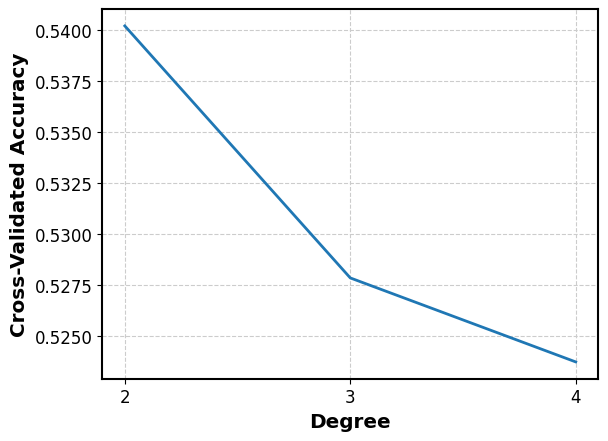

In [93]:
# Plot Cross-Validation results for SVM
plt.plot(degree_grid, acc_scores)
plt.xticks(degree_grid)
plt.xlabel('Degree')
plt.ylabel('Cross-Validated Accuracy')

In [94]:
model_svc = SVC(kernel = 'poly', degree = 2, C = 1E6).fit(X_train, y_train)

Prediction on test

In [95]:
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [96]:
# Accuracy (how percent True prediction?)
accuracy_score(y_test, y_pred_svc) * 100

55.952380952380956

In [97]:
# Confusion Matrix for test dataset
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svc)
print(confusion_matrix_svm)

#                prediction_0  prediction_1
# observation_0      22            87
# observation_1      24            119

[[ 22  87]
 [ 24 119]]


Model Evaluation (based-on Confusion Matrix)

In [98]:
# Positive Predictive Value: if model says the market is Bullish, how percent really will be Bullish?
svm_ppv = 119 / (119 + 87)

svm_ppv * 100

57.76699029126213

In [99]:
# Negative Predictive Value: if model says the market is Bearish, how percent really will be Bearish?
svm_npv = 22 / (22 + 24)

svm_npv * 100

47.82608695652174

## Summary of different models results on test data (Prediction Accuracy)

> Logistic Regression: 52.77, PPV = 57.59, NPV = 44.68

> Random Forest: 55.95, PPV = 57.47, NPV = 47.36

> Naive Bayes Classifier: 44.44, **PPV = 80.00**, NPV = 43.72

> Linear Discriminant Analysis: 50.39, PPV = 56.61, NPV = 43.10

> **Support Vector Machines**: **55.95**, PPV = 57.76, **NPV = 47.82**

# Strategy Implementation

In [100]:
# Define the features set X (features-matrix)
X_real = real[['sma5_lag1',
                 'sma20_lag1',
                 'ema5_lag1',
                 'ema20_lag1',
                 'rsi3_lag1',
                 'h_lag1',
                 'l_lag1',
                 'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                 'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5'
                        ]]
X_real = sm.add_constant(X_real)  # adding a constant column (a column of 1)
X_real.head()

,const,sma5_lag1,sma20_lag1,ema5_lag1,ema20_lag1,rsi3_lag1,h_lag1,l_lag1,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,
2022-01-03,1.0,4783.102051,4687.743042,4765.047563,4704.156522,60.864223,4786.830078,4765.750000,-0.002626,-0.002990,0.001402,-0.001010,0.013839,-0.143084,0.054547,0.094312,-0.022514,-0.049004
2022-01-04,1.0,4784.176074,4700.649536,4775.551728,4712.956858,63.208666,4796.640137,4758.169922,0.006374,-0.002626,-0.002990,0.001402,-0.001010,0.430649,-0.143084,0.054547,0.094312,-0.022514
2022-01-05,1.0,4785.614062,4710.743042,4781.547832,4720.631447,79.658265,4818.620117,4774.270020,-0.000630,0.006374,-0.002626,-0.002990,0.001402,0.222434,0.430649,-0.143084,0.054547,0.094312
2022-01-06,1.0,4767.118066,4711.434546,4754.558580,4718.721793,56.091812,4797.700195,4699.439941,-0.019393,-0.000630,0.006374,-0.002626,-0.002990,0.043729,0.222434,0.430649,-0.143084,0.054547
2022-01-07,1.0,4750.582031,4711.176538,4735.055655,4716.562556,15.839523,4725.009766,4671.259766,-0.000964,-0.019393,-0.000630,0.006374,-0.002626,-0.121253,0.043729,0.222434,0.430649,-0.143084


In [101]:
# Define response variable (response-matrix)
y_real = real['trend']
y_real.head()

Date
2022-01-03    1
2022-01-04    0
2022-01-05    0
2022-01-06    0
2022-01-07    0
Name: trend, dtype: int32

Prediction on real

In [102]:
y_prob_real_lr = model_lr.predict(X_real)
y_pred_real_lr = pd.Series([1 if _ > 0.48 else 0 for _ in y_prob_real_lr], index = y_real.index)
y_pred_real_rf = pd.Series(model_rf.predict(X_real.iloc[:, 1:]), index = y_real.index)
y_pred_real_nb = pd.Series(model_nb.predict(X_real.iloc[:, 1:]), index = y_real.index)
y_pred_real_lda = pd.Series(model_lda.predict(X_real.iloc[:, 1:]), index = y_real.index)
y_pred_real_svm = pd.Series(model_svc.predict(X_real.iloc[:, 1:]), index = y_real.index)

y_pred_lr_por = np.array([lr_ppv if _ == 1 else -lr_npv for _ in y_pred_real_lr])
y_pred_rf_por = np.array([rf_ppv if _ == 1 else -rf_npv for _ in y_pred_real_rf])
y_pred_nb_por = np.array([nb_ppv if _ == 1 else -nb_npv for _ in y_pred_real_nb])
y_pred_lda_por = np.array([lda_ppv if _ == 1 else -lda_npv for _ in y_pred_real_lda])
y_pred_svm_por = np.array([svm_ppv if _ == 1 else -svm_npv for _ in y_pred_real_svm])
y_pred_real_por = y_pred_lr_por + y_pred_rf_por + y_pred_nb_por + y_pred_lda_por + y_pred_svm_por
y_pred_real_pred = pd.Series([1 if _ > 0 else 0 for _ in y_pred_real_por], index = y_real.index)

In [103]:
# Accuracy (how percent True prediction?)
print('Logistic Regression: {:.2f}'.format(accuracy_score(y_real, y_pred_real_lr) * 100),
      'Random Forest: {:.2f}'.format(accuracy_score(y_real, y_pred_real_rf) * 100),
      'Naive Bayes: {:.2f}'.format(accuracy_score(y_real, y_pred_real_nb) * 100),
      'LDA: {:.2f}'.format(accuracy_score(y_real, y_pred_real_lda) * 100),
      'SVM: {:.2f}'.format(accuracy_score(y_real, y_pred_real_svm) * 100),
      'Voting: {:.2f}'.format(accuracy_score(y_real, y_pred_real_pred) * 100),
      sep = '\n')

Logistic Regression: 50.42
Random Forest: 49.01
Naive Bayes: 53.54
LDA: 50.42
SVM: 49.86
Voting: 49.58


# Simulate Real Trading

In [104]:
real['pred'] = y_pred_real_pred  # model prediction
real.head()

C:\Users\mamal\AppData\Local\Temp\ipykernel_5880\119940391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['pred'] = y_pred_real_pred  # model prediction


,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,4784.176074,4700.649536,4775.551728,4712.956858,...,0.001402,-0.001010,0.013839,-0.143084,0.054547,0.094312,-0.022514,-0.049004,1,1
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,4785.614062,4710.743042,4781.547832,4720.631447,...,-0.002990,0.001402,-0.001010,0.430649,-0.143084,0.054547,0.094312,-0.022514,0,0
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,4767.118066,4711.434546,4754.558580,4718.721793,...,-0.002626,-0.002990,0.001402,0.222434,0.430649,-0.143084,0.054547,0.094312,0,1
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,4750.582031,4711.176538,4735.055655,4716.562556,...,0.006374,-0.002626,-0.002990,0.043729,0.222434,0.430649,-0.143084,0.054547,0,0
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,4732.751953,4711.655518,4715.713699,4712.797530,...,-0.000630,0.006374,-0.002626,-0.121253,0.043729,0.222434,0.430649,-0.143084,0,1


In [105]:
real['balance'] = 0  # Balance over time (shows result of our trading in each day)
real.head()

C:\Users\mamal\AppData\Local\Temp\ipykernel_5880\2745490301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['balance'] = 0  # Balance over time (shows result of our trading in each day)


,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,4784.176074,4700.649536,4775.551728,4712.956858,...,-0.001010,0.013839,-0.143084,0.054547,0.094312,-0.022514,-0.049004,1,1,0
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,4785.614062,4710.743042,4781.547832,4720.631447,...,0.001402,-0.001010,0.430649,-0.143084,0.054547,0.094312,-0.022514,0,0,0
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,4767.118066,4711.434546,4754.558580,4718.721793,...,-0.002990,0.001402,0.222434,0.430649,-0.143084,0.054547,0.094312,0,1,0
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,4750.582031,4711.176538,4735.055655,4716.562556,...,-0.002626,-0.002990,0.043729,0.222434,0.430649,-0.143084,0.054547,0,0,0
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,4732.751953,4711.655518,4715.713699,4712.797530,...,0.006374,-0.002626,-0.121253,0.043729,0.222434,0.430649,-0.143084,0,1,0


In [106]:
# Initial Deposit in begining of 2022: $1000
real.loc['2022-01-03','balance'] = 1000
real.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,4784.176074,4700.649536,4775.551728,4712.956858,...,-0.001010,0.013839,-0.143084,0.054547,0.094312,-0.022514,-0.049004,1,1,1000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,4785.614062,4710.743042,4781.547832,4720.631447,...,0.001402,-0.001010,0.430649,-0.143084,0.054547,0.094312,-0.022514,0,0,0
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,4767.118066,4711.434546,4754.558580,4718.721793,...,-0.002990,0.001402,0.222434,0.430649,-0.143084,0.054547,0.094312,0,1,0
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,4750.582031,4711.176538,4735.055655,4716.562556,...,-0.002626,-0.002990,0.043729,0.222434,0.430649,-0.143084,0.054547,0,0,0
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,4732.751953,4711.655518,4715.713699,4712.797530,...,0.006374,-0.002626,-0.121253,0.043729,0.222434,0.430649,-0.143084,0,1,0


In [107]:
# Trade simulation (the algorithm decides to Buy or Sell based-on model prediction)
for i in range(1, real.shape[0]):
    if real.iloc[i, 31] == 1:
        real.iloc[i, 32] = real.iloc[i - 1, 32] * real.iloc[i, 3] / real.iloc[i, 0]
    
    if real.iloc[i, 31] == 0:
        real.iloc[i, 32] = real.iloc[i - 1, 32] * real.iloc[i, 0] / real.iloc[i, 3]
        
real.head()

C:\Users\mamal\AppData\Local\Temp\ipykernel_5880\3384171590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real.iloc[i, 32] = real.iloc[i - 1, 32] * real.iloc[i, 0] / real.iloc[i, 3]


,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,ema5,ema20,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,4784.176074,4700.649536,4775.551728,4712.956858,...,-0.001010,0.013839,-0.143084,0.054547,0.094312,-0.022514,-0.049004,1,1,1000.000000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,4785.614062,4710.743042,4781.547832,4720.631447,...,0.001402,-0.001010,0.430649,-0.143084,0.054547,0.094312,-0.022514,0,0,1002.288440
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,4767.118066,4711.434546,4754.558580,4718.721793,...,-0.002990,0.001402,0.222434,0.430649,-0.143084,0.054547,0.094312,0,1,983.990535
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,4750.582031,4711.176538,4735.055655,4716.562556,...,-0.002626,-0.002990,0.043729,0.222434,0.430649,-0.143084,0.054547,0,0,983.433239
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,4732.751953,4711.655518,4715.713699,4712.797530,...,0.006374,-0.002626,-0.121253,0.043729,0.222434,0.430649,-0.143084,0,1,979.114367


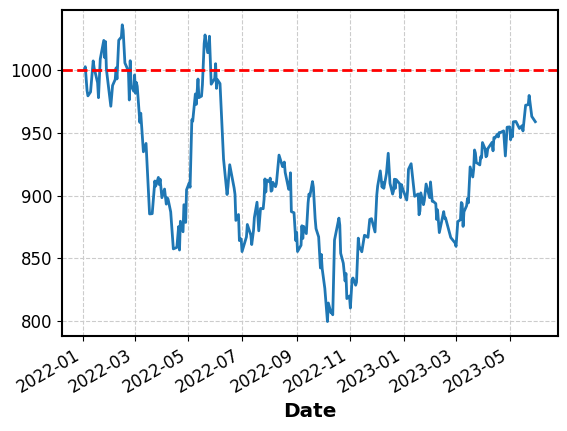

In [108]:
# Plot 'balance' during time
real['balance'].plot()
plt.axhline(1000, color = 'red', linewidth = 2, linestyle = '--')